In [1]:
from engine.data_setup import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
images = np.load('./datasets/ver5/train/images.npy')
masks = np.load('./datasets/ver5/train/masks.npy')

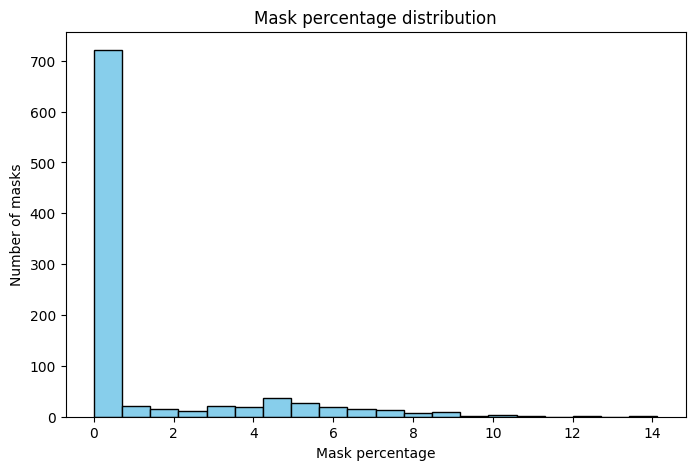

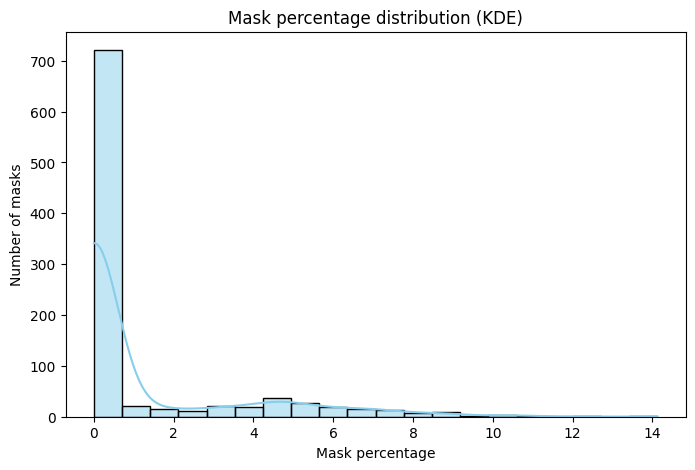

In [3]:
from helper.utilities import *

mask_percentages = [calculate_mask_percentage(i) for i in masks]

plt.figure(figsize=(8, 5))
plt.hist(mask_percentages, bins=20, color='skyblue', edgecolor='black')
plt.title('Mask percentage distribution')
plt.xlabel('Mask percentage')
plt.ylabel('Number of masks')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(mask_percentages, bins=20, kde=True, color='skyblue')
plt.title('Mask percentage distribution (KDE)')
plt.xlabel('Mask percentage')
plt.ylabel('Number of masks')
plt.show()

In [ ]:
train_dataset = get_dataset(mode='train', name='ver5', channels=3, clahe=True)

In [5]:
train_dataloader = get_dataloader(mode='train', name='ver5', channels=3)

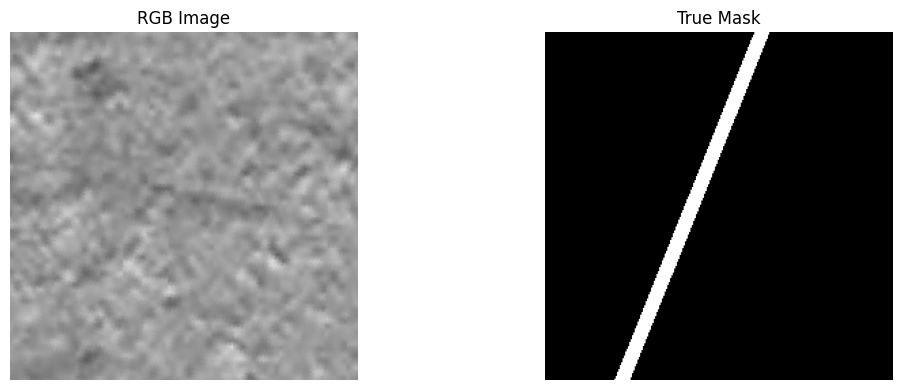

In [17]:
# 12
train_dataset.show(10, augmented=False)

In [61]:
np.mean(train_dataset[102][0][3, :, :].numpy())

np.float32(-4.9449477)

In [10]:
train_dataset.images[102][:, : ,3]

array([[0.45710653, 0.45710352, 0.45712447, ..., 0.45642808, 0.4564479 ,
        0.45645556],
       [0.45712107, 0.4571181 , 0.45712277, ..., 0.45641592, 0.45643485,
        0.45644304],
       [0.45719108, 0.4571786 , 0.45714024, ..., 0.45639133, 0.45640874,
        0.45641693],
       ...,
       [0.4557908 , 0.4556906 , 0.45563957, ..., 0.45624968, 0.45618305,
        0.4561497 ],
       [0.45575824, 0.45565808, 0.4556255 , ..., 0.45609546, 0.45602804,
        0.4559944 ],
       [0.45572424, 0.45562553, 0.45561278, ..., 0.45593917, 0.45586717,
        0.45583352]], shape=(256, 256), dtype=float32)

In [15]:
# Mean for ver5 data
print(f"DEM: {np.mean(train_dataset.images[:, :, :, 3])} - {np.std(train_dataset.images[:, :, :, 3])}")
print(f"R: {np.mean(train_dataset.images[:, :, :, 0])} - {np.std(train_dataset.images[:, :, :, 0])}")
print(f"G: {np.mean(train_dataset.images[:, :, :, 1])}  - {np.std(train_dataset.images[:, :, :, 1])}")
print(f"B: {np.mean(train_dataset.images[:, :, :, 2])} - {np.std(train_dataset.images[:, :, :, 2])}")

DEM: 0.43203553557395935 - 0.08720599859952927
R: 0.6237013936042786 - 0.20070211589336395
G: 0.6243346333503723  - 0.19969575107097626
B: 0.623600423336029 - 0.20078885555267334


In [11]:
for i in range(len(masks)):
    if masks[i][1].sum() != 0:
        print(i)

0
6
10
13
31
38
46
53
54
64
76
78
79
81
82
84
89
99
101
102
106
115
121
124
126
127
128
138
139
147
150
152
182
185
194
198
200
212
215
225
230
241
246
254
257
265
267
280
281
294
295
297
300
306
310
315
319
322
325
332
343
347
352
359
370
378
389
391
394
396
403
415
416
418
421
422
423
427
430
431
433
443
445
449
463
465
491
493
498
503
508
511
516
518
521
526
531
532
550
561
563
566
574
576
578
579
581
586
588
599
604
607
618
624
636
640
645
649
654
655
660
665
671
687
688
695
708
714
718
721
722
729
734
741
757
763
775
783
788
805
810
815
821
823
826
829
830
838
841
843
849
857
867
870
872
877
878
879
883
886
888
892
902
911
916
921
926
934
937
